In [ ]:
n_album = 212
preco_pacote = 4
cromos_por_pacote = 4
preco_album = 10 
simulacoes = 1000

In [ ]:
import numpy as np

# representação do álbum
album = np.zeros(n_album) 

# representação do pacote de figurinhas
pacotinho = np.random.choice(range(n_album), cromos_por_pacote)
pacotinho

# 'colando' as figurinhas obtidas no álbum
for i in pacotinho:
    album[i] += 1

In [ ]:
# comprando figurinhas até completar o álbum
def SimulaAlbum():
    album = np.zeros(n_album) 
    pacotes = 0
    while not np.all(album >= 1):
        pacotinho = np.random.choice(range(n_album), 4)
        pacotes += 1

        for i in pacotinho:
            album[i] += 1
 
    valor_gasto = preco_album + preco_pacote * pacotes 

    return valor_gasto, pacotes

SimulaAlbum()

(974, 241)

In [ ]:
def Simulacao(simulacoes = 1000, silencio = False):
    valores = []
    for i in range(simulacoes):
        valores.append(SimulaAlbum()[0])
        if not silencio:
            if (i+1) % 100 == 0:
                print('Simulação: ', i+1, '/', simulacoes)
    return valores

sim = Simulacao(simulacoes)

Simulação:  100 / 1000
Simulação:  200 / 1000
Simulação:  300 / 1000
Simulação:  400 / 1000
Simulação:  500 / 1000
Simulação:  600 / 1000
Simulação:  700 / 1000
Simulação:  800 / 1000
Simulação:  900 / 1000
Simulação:  1000 / 1000


In [ ]:
#questões 1 e 2
print('O valor médio gasto foi:', round(np.mean(sim), 2))
print('O numero de pacotes médio foi:', round((np.mean(sim) - preco_album)/preco_pacote, 2))

O valor médio gasto foi: 1273.05
O numero de pacotes médio foi: 315.76


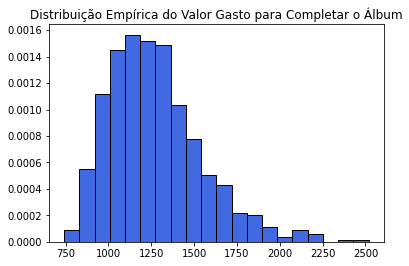

In [ ]:
#questão 3
import matplotlib.pyplot as plt
plt.hist(sim, bins = 20, density = True, color = 'royalblue', edgecolor = 'black')
plt.title('Distribuição Empírica do Valor Gasto para Completar o Álbum')
plt.show()

In [ ]:
# questoes 4 e 5
 
prob1 = sum(np.array(sim) < 1500)/simulacoes
prob2 = sum(np.array(sim) > np.array(sim).mean())/simulacoes
 
print('A probabilidade de se gastar menos de 1500 é {:.2f}%'.format(prob1*100))
print('A probabilidade de se gastar mais do que a média é {:.2f}%'.format(prob2*100))

A probabilidade de se gastar menos de 1500 é 10.00%
A probabilidade de se gastar mais do que a média é 4.50%


In [ ]:
# questao 6

qts = np.quantile(sim, [0.025, 0.975])
print('O intervalo de confiança de 95% para o gasto total é ({:.2f}, {:.2f})'.format(qts[0], qts[1]))

O intervalo de confiança de 95% para o gasto total é (655.70, 1196.40)


In [ ]:
# comprando figurinhas até completar o álbum
def SimulaAlbum(qtde_albuns = 1):
    album = np.zeros(n_album) 
    pacotes = 0
    while not np.all(album >= qtde_albuns):
        pacotinho = np.random.choice(range(n_album), 4)
        pacotes += 1

        for i in pacotinho:
            album[i] += 1
 

    valor_gasto = qtde_albuns*preco_album + preco_pacote * pacotes 
    valor_gasto_por_album = valor_gasto/qtde_albuns

    return valor_gasto, pacotes, valor_gasto_por_album

SimulaAlbum(2)

(1576, 389, 788.0)

In [ ]:
def Simulacao(qtde_albuns, simulacoes = 1000, silencio = False):
    valores = []
    for i in range(simulacoes):
        valores.append(SimulaAlbum(qtde_albuns)[2])
        if not silencio:
            if (i+1) % 100 == 0:
                print('Simulação: ', i+1, '/', simulacoes)
    return valores

sim = Simulacao(qtde_albuns = 2, simulacoes = 100)

Simulação:  100 / 100


In [ ]:
# questões 7 e 8

sim2 = Simulacao(2, 100, silencio = True) 
c2 = np.array(sim2).mean() 

sim3 = Simulacao(3, 100, silencio = True) 
c3 = np.array(sim3).mean()  

print('Custo médio entre 2 amigos:', round(c2, 2) )
print('Custo médio entre 3 amigos:', round(c3, 2) )

Custo médio entre 2 amigos: 865.12
Custo médio entre 3 amigos: 725.41


In [ ]:
import time

In [ ]:
def SimulacaoAmigos(amigos = 40, simulacoes = 10):
    medias = []
    amigos = list(range(1, amigos + 1, 1))
    for i in amigos: 
        t = time.time()
        aux = Simulacao(i, simulacoes, silencio = True)
        tempo = round(time.time() - t, 2)
        print('Tempo total de {}s para a simulação com {} amigo(s)'.format(tempo, i))
        medias.append(np.array(aux).mean())
    return amigos, medias

sim_amigos = SimulacaoAmigos(amigos = 10, simulacoes = 5)

Tempo total de 0.17s para a simulação com 1 amigo(s)
Tempo total de 0.23s para a simulação com 2 amigo(s)
Tempo total de 0.31s para a simulação com 3 amigo(s)
Tempo total de 0.32s para a simulação com 4 amigo(s)
Tempo total de 0.28s para a simulação com 5 amigo(s)
Tempo total de 0.41s para a simulação com 6 amigo(s)
Tempo total de 0.46s para a simulação com 7 amigo(s)
Tempo total de 0.55s para a simulação com 8 amigo(s)
Tempo total de 0.55s para a simulação com 9 amigo(s)
Tempo total de 0.59s para a simulação com 10 amigo(s)


In [ ]:
import math

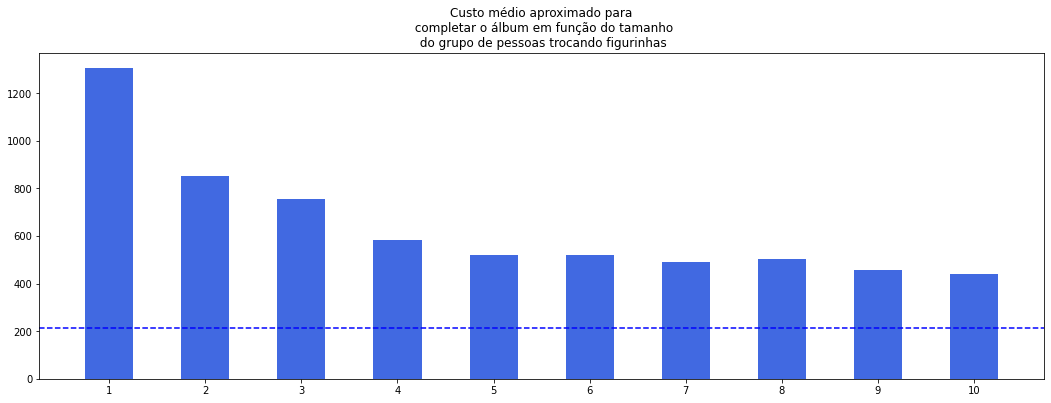

In [ ]:
def GraficoCustoAmigos(simulacao):

    minimo_possivel = math.ceil(n_album/cromos_por_pacote)*preco_pacote 

    plt.figure(figsize=(18, 6))
    plt.bar(simulacao[0], simulacao[1], width = 0.5, color = 'royalblue')
    plt.xticks(simulacao[0])
    plt.axhline(y = minimo_possivel, linestyle = 'dashed', color = 'blue')
    plt.title('Custo médio aproximado para\n completar o álbum em função do tamanho\n do grupo de pessoas trocando figurinhas')
    plt.show()

GraficoCustoAmigos(sim_amigos)